<h1 style='text-align: center;font-size:19px;'>Post Graduate Earnings based on College Majors </h1>

<p style='text-align: center;font-size:17px;'> <i><b> Author : Kenneth Lucas Kusima <br> Attributor: DataQuest </b> </i> </p>

## Project Origin:
<p style='text-align: justify;'> $\hspace{10 mm}$This project was made per instructions from: </p> 
       
<center> $\textbf{The DataQuest Course: Exploratory Data Visualization}$</center>

## Objectives:

The aim is to vizualize and analyse the job outcomes of students who graduated from college between 2010 and 2012. The analysis hopes to observe what differences, patterns and anomalies exist when comparing earnings from different college majors.

The dataset used is a FiveThirtyEight cleaned up version of the job outcomes data released by the American COmmunity Survey : https://www.census.gov/programs-surveys/acs/

The columns involved are as follows:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
recent_grads = pd.read_csv('recent-grads.csv')
print('The first row :')
print(recent_grads.iloc[0] , '\n')
print('The first few columns :')
print(recent_grads.head(), '\n')
print('The last columns :')
print(recent_grads.tail(), '\n')
print('The statistical summary of the different columns :')
print(recent_grads.describe(), '\n')

The first row :
Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: ob

From looking at the values above, it can be seen that atleast 1 row contains missing data for the 'Men' and 'Women' entiries. Since Matplotlib would require values of matching lengths, any missing values would result in an error.

In [130]:
raw_data_count = len(recent_grads) #Counting all the number or rows 
print(raw_data_count)

173


In [131]:
recent_grads = recent_grads.dropna() #Removing the rows with missing data
cleaned_data_count = len(recent_grads) #Counting the new number or rows 
print(cleaned_data_count)

172


## Pandas Plotting functionality

### 1. Scatter Plots

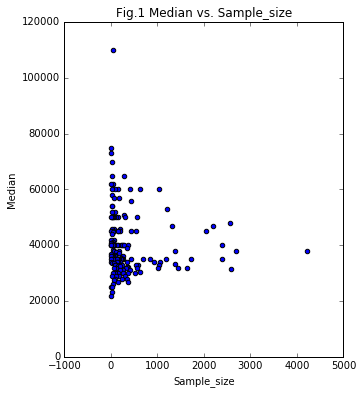

In [132]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Fig.1 Median vs. Sample_size', figsize=(5,6))

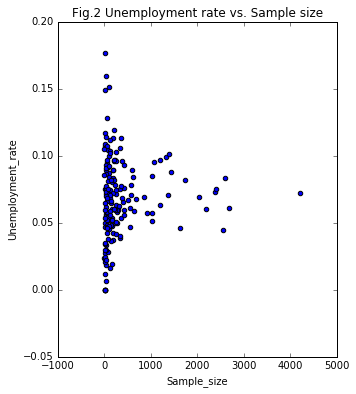

In [133]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Fig.2 Unemployment rate vs. Sample size', figsize=(5,6))

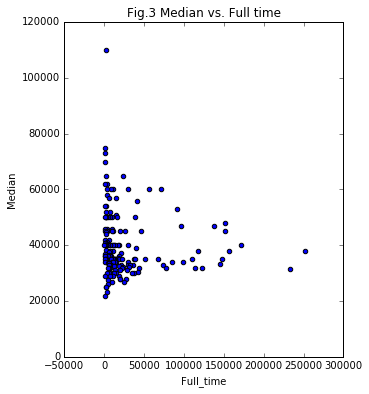

In [134]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Fig.3 Median vs. Full time', figsize=(5,6))

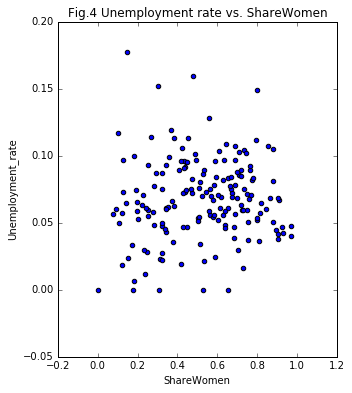

In [135]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Fig.4 Unemployment rate vs. ShareWomen', figsize=(5,6))

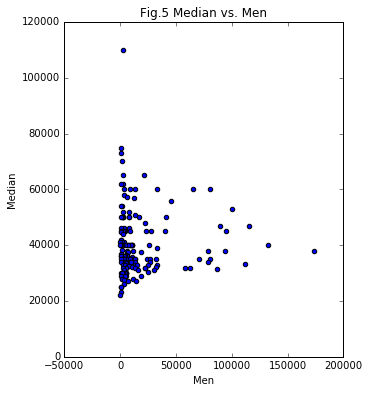

In [136]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Fig.5 Median vs. Men', figsize=(5,6))

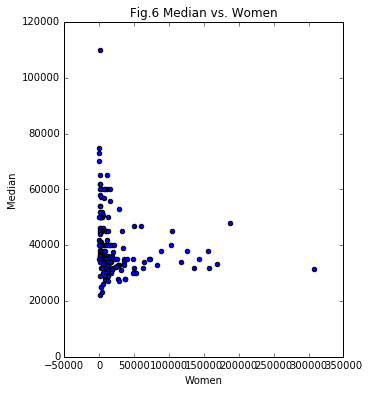

In [137]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Fig.6 Median vs. Women', figsize=(5,6))

The Scatter plots above help us see the following observations:

- Assuming that the most popular majors have the higher number of full time employees, Fig. 3 shows us that student in more popular majors do not make more money. This is evident from the week correlation between number of full time employees and the median salary

- Comparing Fig.6 and Fig.5 shows that the students who majored in subjects that were majority female would not make more money

### 2. Histograms

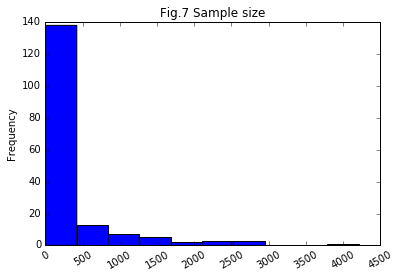

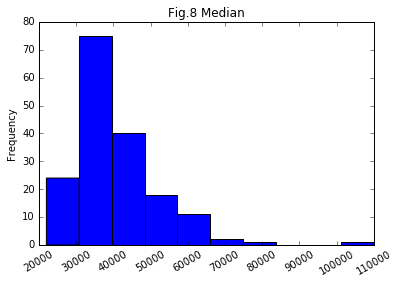

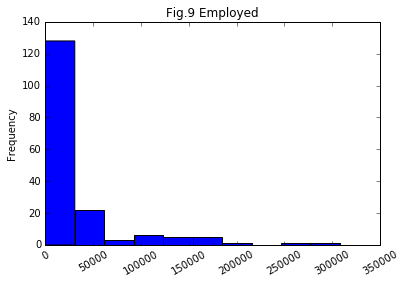

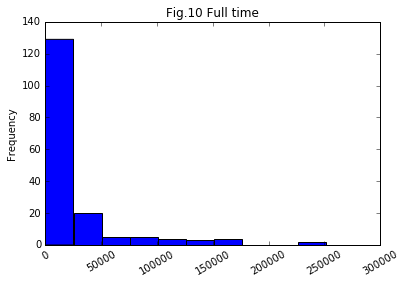

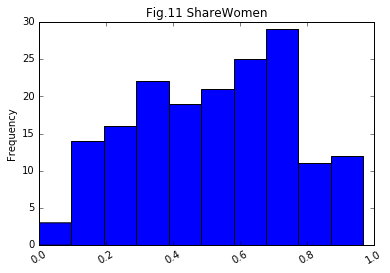

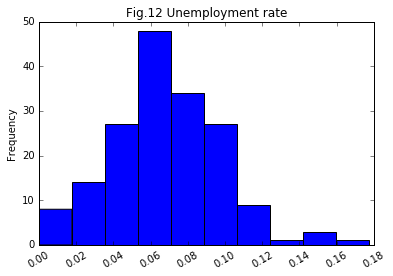

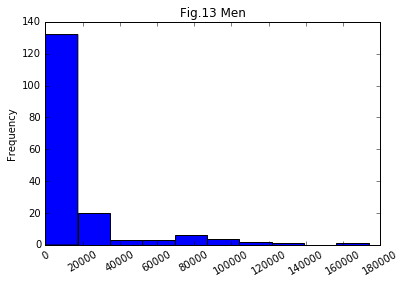

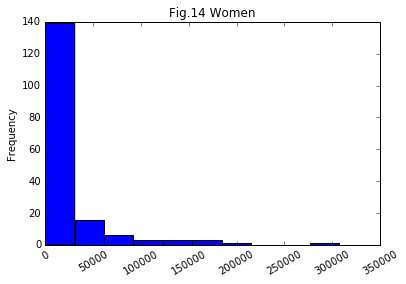

In [138]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

j = 6 
for i in cols:
    j += 1
    k = str(j)
    plt.figure()
    recent_grads[i].plot(kind='hist',title =str('Fig.' + k +' ' + i.replace('_',' ')), rot = 30)


The Histograms above help us see the following observations:

- It can be seen from Fig.13 and Fig.14 that there a more majors that are predominantly men than there are women

- From Fig.8 we see the most common median salary to be between 30,000 and 40,000 dollars

### 3. Scatter Martix Plots

Fig.15 Scatter Matrix Plot: Sample Size vs Median


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe28ccf7c18>,
      dtype=object)

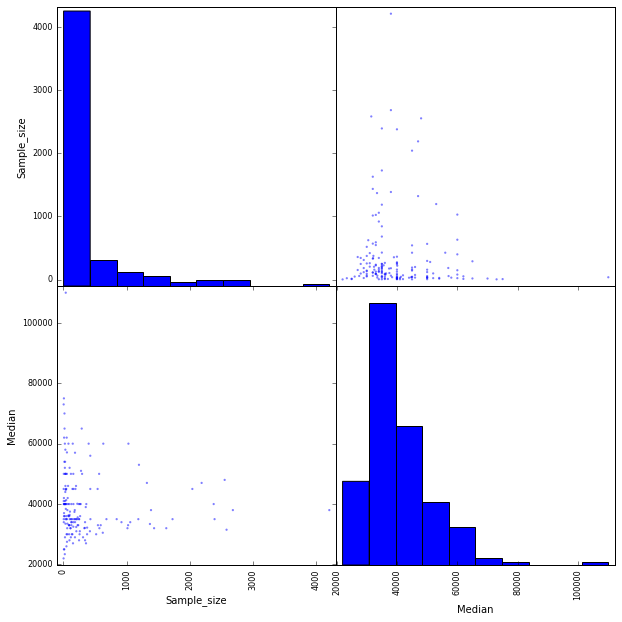

In [139]:
from pandas.plotting import scatter_matrix
print('Fig.15 Scatter Matrix Plot: Sample Size vs Median')
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

Fig.16 Scatter Matrix Plot: Sample Size vs Median vs Unemployment rate


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe28c8a2da0>,
      dtype=object)

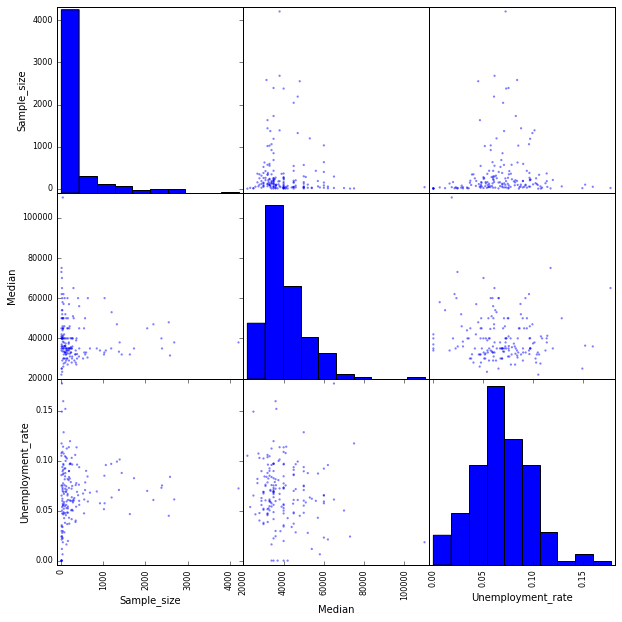

In [140]:
print('Fig.16 Scatter Matrix Plot: Sample Size vs Median vs Unemployment rate')
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

Fig.17 Scatter Matrix Plot: Median vs Men vs Women


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe28d4efac8>,
      dtype=object)

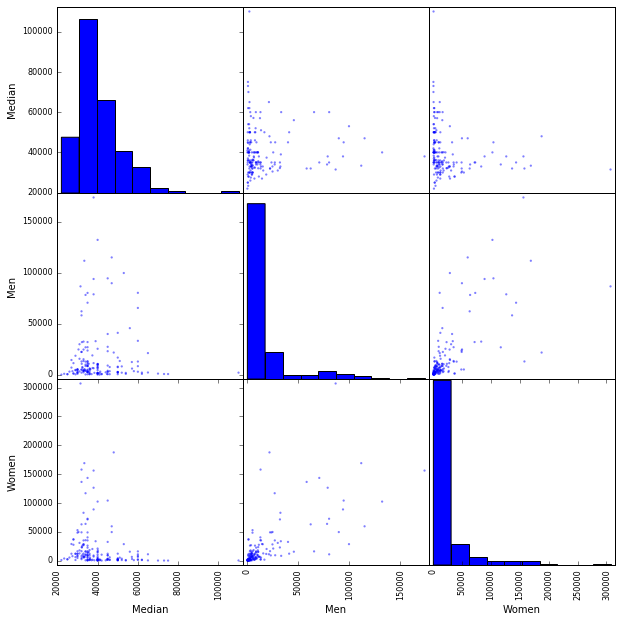

In [141]:
print('Fig.17 Scatter Matrix Plot: Median vs Men vs Women')
scatter_matrix(recent_grads[['Median', 'Men','Women']], figsize=(10,10))

From Fig.17 it can be seen that are is higher distribution of men in to the left than there is for women, this suggests that more majors exist thathave predmoinantly male popluation. Furthermore, We can see that not only is the median salary 30,000 to 40,000 ; it is also achieved more by men than by women.

### 4. Bar Plots

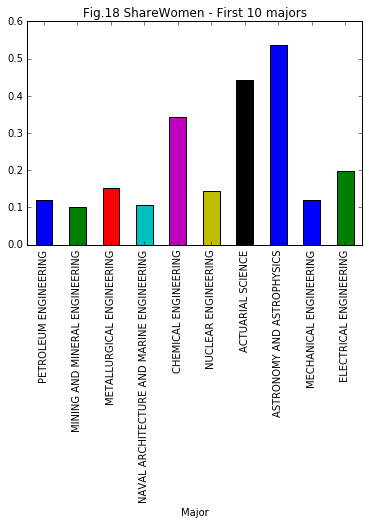

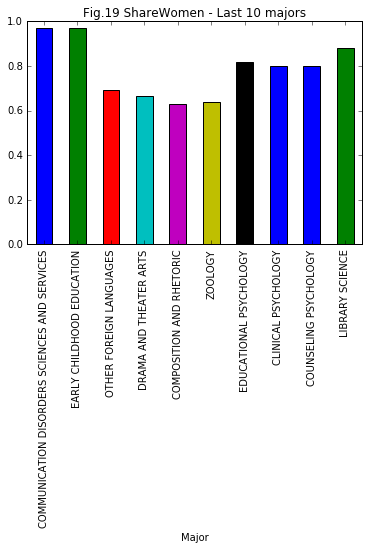

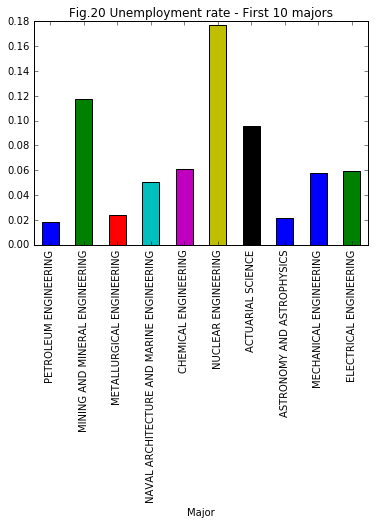

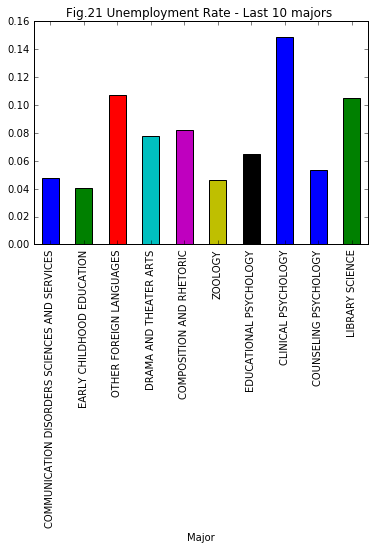

In [142]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen',legend = False, title = 'Fig.18 ShareWomen - First 10 majors')
recent_grads[len(recent_grads)-10:].plot.bar(x='Major', y='ShareWomen',legend = False, title = 'Fig.19 ShareWomen - Last 10 majors')

recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate',legend = False, title = 'Fig.20 Unemployment rate - First 10 majors')
recent_grads[len(recent_grads)-10:].plot.bar(x='Major', y='Unemployment_rate',legend = False,title = 'Fig.21 Unemployment Rate - Last 10 majors ')

Fig. 18 and 19 allows for the comparison in the amount of women presence amongst the first and last ten majors respectively. Fig. 20 and 21 enables comparison of the unemployment rates for the first and last ten majors respectively.